## Airbnb NYC

Kaggle's Airbnb NYC data. More info about the data is <a href="https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data">here.</a> EDA only.

### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
3. [EDA](#EDA)   

### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

In [5]:
df = pd.read_csv('../data/AB_NYC_2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
len(df)

48895

In [10]:
# %missing values
df.isna().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [11]:
# get rid of unnecessary columns
df = df.drop(['id','host_name','last_review'], axis=1)

# fill nan values
df['reviews_per_month'].fillna(0, inplace=True)

In [24]:
len(df[df['name'].isnull()])

16

### EDA

In [27]:
# Neighbourhood Group
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

(-10, 1000)

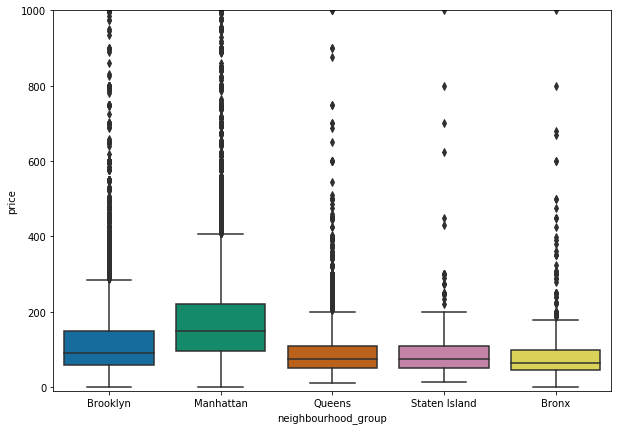

In [34]:
sns.boxplot(x='neighbourhood_group',y='price',data=df)
plt.ylim(-10,1000) # lots of outliers

In [29]:
# Neighbourhood
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [31]:
# Room type
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

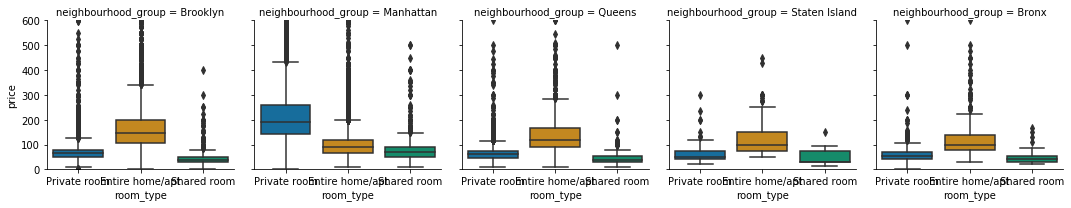

In [48]:
# Room types & Neighbourhood groups
g = sns.FacetGrid(data=df,col='neighbourhood_group',margin_titles=True,ylim=(0,600))
g.map(sns.boxplot,'room_type','price',palette='colorblind')

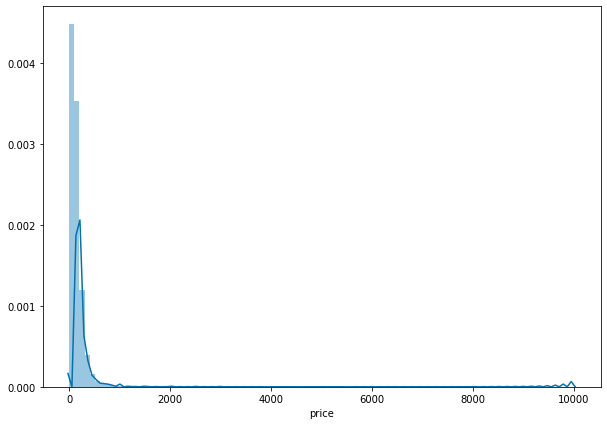

In [67]:
# Prices
sns.distplot(df.price,bins=100)

<Figure size 720x720 with 0 Axes>

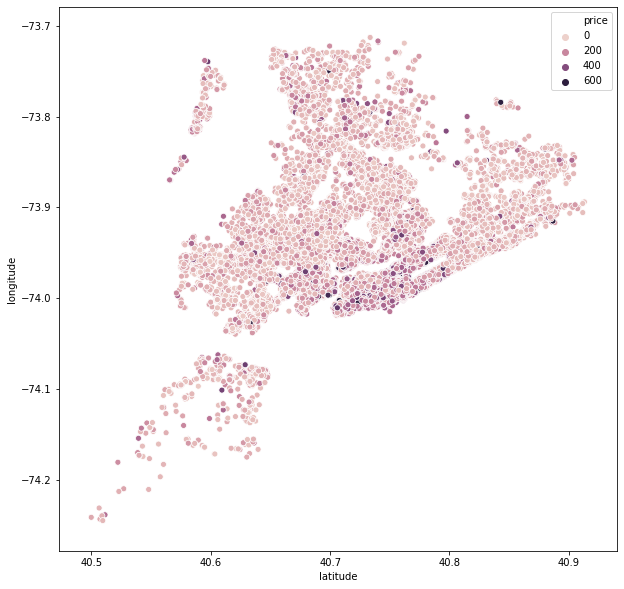

In [54]:
# Prices (<=600) across NYC
plt.figure(figsize=(10,10))
sns.scatterplot(x='latitude',y='longitude',data=df[df.price<=600],hue='price')

<Figure size 576x576 with 0 Axes>

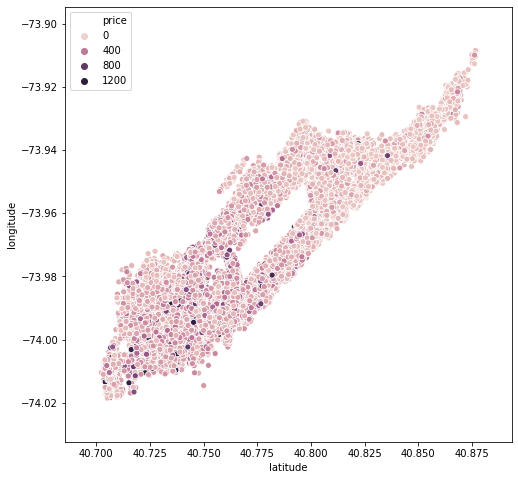

In [61]:
# Prices in Manhattan (<=1000)
plt.figure(figsize=(8,8))
sns.scatterplot(x='latitude',y='longitude',data=df[(df.neighbourhood_group=='Manhattan')&(df.price<=1000)],hue='price')

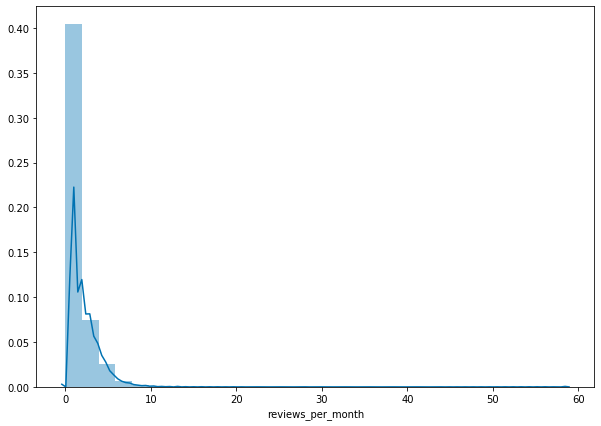

In [56]:
# Reviews histogram
sns.distplot(df.reviews_per_month,bins=30)

In [58]:
# Top 10 hosts
df.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

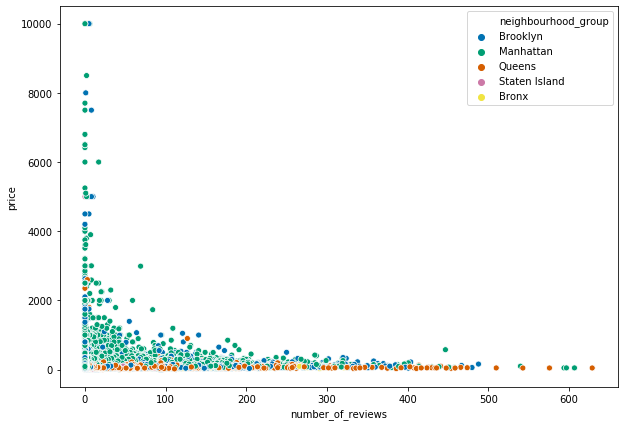

In [69]:
# Price vs Num of Reviews
sns.scatterplot(x='number_of_reviews',y='price',data=df,hue='neighbourhood_group')